In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm

from src.data import CATARACTS

In [2]:
N = 3
T = 3
def map_phases_(t: torch.Tensor):
    t[t == 3] = 1
    t[t == 5] = 3
    t[t == 6] = 4
    t[t == 8] = 5
    t[t == 10] = 6
    t[t == 13] = 8
    t[t == 14] = 8
ds = CATARACTS(
    root="/local/scratch/CATARACTS-videos-processed/",
    n_seq_frames=T,
    dt=T,
    split="Test",
    phases=[3],
    sample_phase_annotations=True,
    map_phase_annotations=map_phases_
)
dl = DataLoader(ds, batch_size=N, num_workers=1, shuffle=True)

/home/yannik/Temporal-Consistent-CycleGAN/src/data/eye_surgery_dataset.py:58: UserWarning: Passing a phase map converts the label structure from (N, C) one-hot to (N,) integer values.
  warnings.warn("Passing a phase map converts the label structure"


In [3]:
sample = next(iter(dl))
img_seq = sample['img_seq']
case_ids = sample['case_id']
frame_nrs = sample['frame_nrs']
phase_seq = sample['phase_seq']

In [4]:
frame_nrs

[tensor([1312,  566,  354]),
 tensor([1314,  568,  356]),
 tensor([1316,  570,  358])]

In [5]:
phase_seq

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

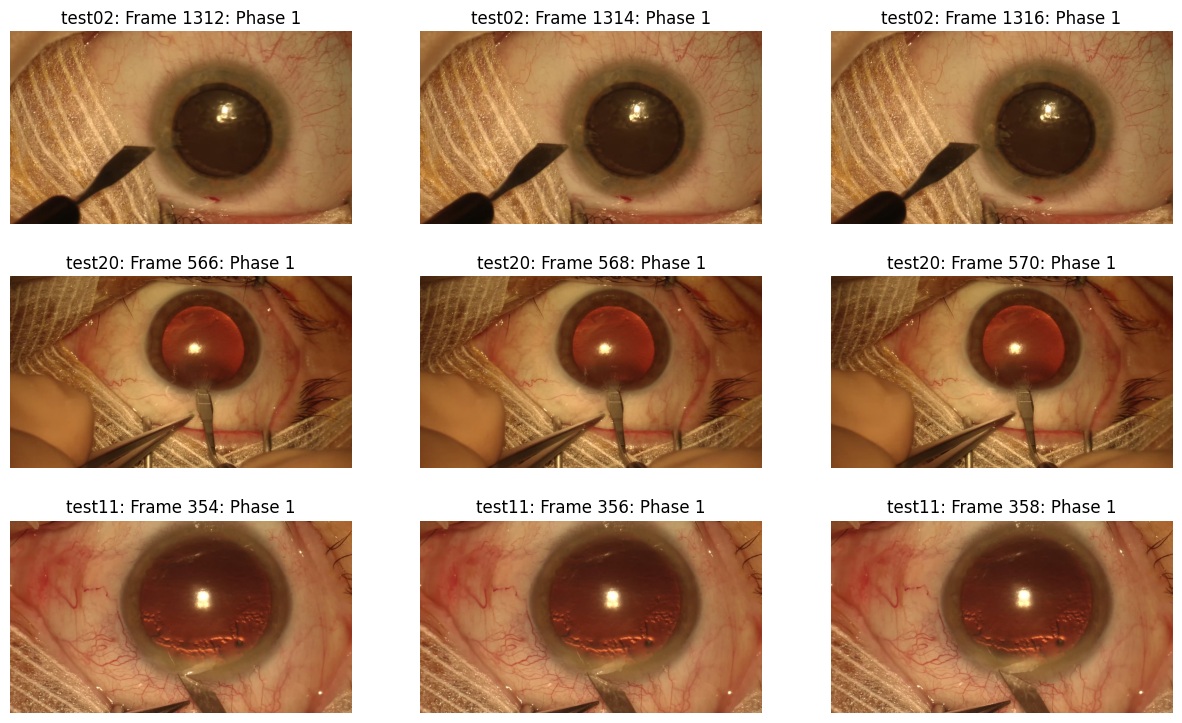

In [6]:
fig, ax = plt.subplots(N, T, figsize=(T*5, N*3))
for n in range(N):
    for t in range(T):
        ax[n, t].set_title(f'{case_ids[n]}: Frame {frame_nrs[t][n]}: Phase {phase_seq[t][n]}')
        ax[n, t].axis('off')
        ax[n, t].imshow(img_seq[n, t].permute(1, 2, 0))
plt.autoscale()